In [1]:
import os
import numpy as np
import pandas as pd
import subprocess
import math
import matplotlib.pyplot as plt
# Change working directory to the root
os.chdir('../')
PWD = os.getcwd()

In [2]:
from models.complex import Complex
import dockerasmus.pdb as pdb
import models.protein
from functions import vec_to_dist
import runMini as mini

In [3]:
# load receptor and ligand files
CPX = '1AY7'
OUT = os.path.join(PWD,'Analysis/Results/N_w25_500/')
PRO = os.path.join(OUT,'Proteins')
lig_path = os.path.join(PRO,'1AY7_l_sep_2za4_AB_aligned.pdb')
true_lig_path = os.path.join(PRO,'1AY7_l_true.pdb')
rec_path = os.path.join(PRO,'1AY7_r.pdb')
n = 500
draw_back = True

In [4]:
def rmsd(A,B):
    return math.sqrt(np.mean(np.sum((A-B)**2,axis=1)))

In [5]:
lig = pdb.Protein.from_pdb_file(lig_path)
true_lig = pdb.Protein.from_pdb_file(true_lig_path)
rec = pdb.Protein.from_pdb_file(rec_path)
cpx = Complex(lig=lig,rec=rec)

In [6]:
# load rotation angles generated during distribution analysis
df = pd.read_csv('Analysis/Results/rotation_analysis_angles.txt',sep='\t')
df_normal = df[(df.Distribution == 'normal') & (df.Test == n)].reset_index()
successed_ind = []
for idx, row in df_normal.iterrows():
    A = cpx.rotations(row.Theta,row.Phi,row.Alpha,row.Beta,row.Gamma)
    if draw_back:
        # Move ligand if the minimum distance between two carbon alpha is less than 5
        D = cpx.ca_dist(A)
        i,j = np.unravel_index(D.argmin(), D.shape)
        m = D[i,j]
        if m <5:
            A = A+vec_to_dist(cpx.rec.get_ca()[i],A[cpx.lig.get_ca_ind()][j],25)
    # Write rotated ligand file in pdb
    cpx.lig.write_atoms(os.path.join(PRO,'{:06d}.pdb'.format(idx)),A)
for k in range(n):
    # Rename pdbs, conf is ligand name with the interolog associated, lig_pro is for minimizer, li_pro_o is lig_pro name after minimization
    conf = "{}_{:06d}".format(CPX,k)
    lig_pro = os.path.join(PRO,'{:06d}.pdb'.format(k))
    lig_pro_o = os.path.join(PRO,'{}.pdb'.format(conf))
    successed = mini.run(rec_path,lig_pro,OUT,conf=conf)
    # Rename rotated ligand pdb file
    subprocess.call(["mv",lig_pro,lig_pro_o])
    if successed:
        successed_ind.append(k)
os.chdir(PWD)

Failed on No. 000005
Failed on No. 000011


too far


Failed on No. 000015
Failed on No. 000020
Failed on No. 000026
Failed on No. 000028
Failed on No. 000029
Failed on No. 000034
Failed on No. 000041
Failed on No. 000045
Failed on No. 000047


too far


Failed on No. 000059
Failed on No. 000066
Failed on No. 000070
Failed on No. 000076
Failed on No. 000082
Failed on No. 000087
Failed on No. 000089
Failed on No. 000093
Failed on No. 000100
Failed on No. 000104
Failed on No. 000114


too far


Failed on No. 000115
Failed on No. 000124
Failed on No. 000129


too far


Failed on No. 000130
Failed on No. 000137
Failed on No. 000139
Failed on No. 000144
Failed on No. 000145
Failed on No. 000147
Failed on No. 000155
Failed on No. 000156


too far


Failed on No. 000160


too far


Failed on No. 000162
Failed on No. 000163
Failed on No. 000168
Failed on No. 000172
Failed on No. 000195
Failed on No. 000198


too far


Failed on No. 000201
Failed on No. 000202


too far


Failed on No. 000203
Failed on No. 000212


too far


Failed on No. 000218
Failed on No. 000221
Failed on No. 000223
Failed on No. 000229


too far


Failed on No. 000232


too far


Failed on No. 000239
Failed on No. 000242
Failed on No. 000245
Failed on No. 000249
Failed on No. 000250
Failed on No. 000276
Failed on No. 000287
Failed on No. 000292
Failed on No. 000298
Failed on No. 000299
Failed on No. 000307
Failed on No. 000309
Failed on No. 000311
Failed on No. 000312


too far


Failed on No. 000315
Failed on No. 000318
Failed on No. 000322
Failed on No. 000323
Failed on No. 000324


too far


Failed on No. 000326
Failed on No. 000342
Failed on No. 000346


too far


Failed on No. 000347
Failed on No. 000355
Failed on No. 000361
Failed on No. 000362
Failed on No. 000369
Failed on No. 000370
Failed on No. 000377
Failed on No. 000378
Failed on No. 000384
Failed on No. 000385
Failed on No. 000388


too far


Failed on No. 000389
Failed on No. 000390
Failed on No. 000404
Failed on No. 000406


too far


Failed on No. 000407
Failed on No. 000412
Failed on No. 000414
Failed on No. 000415
Failed on No. 000418
Failed on No. 000421


too far


Failed on No. 000428
Failed on No. 000432
Failed on No. 000440


too far


Failed on No. 000448
Failed on No. 000457
Failed on No. 000458
Failed on No. 000460
Failed on No. 000461
Failed on No. 000462
Failed on No. 000470
Failed on No. 000485
Failed on No. 000486


too far


Failed on No. 000491
Failed on No. 000492
Failed on No. 000493


In [7]:
# Number of succeeded conformations
len(successed_ind)

393

In [8]:
A = true_lig.atom_positions()
files = [os.path.join(OUT,'pdb_mini',f) for f in os.listdir(os.path.join(OUT,'pdb_mini'))]
rmsd_lst = [rmsd(A,pdb.protein.Protein.from_pdb_file(f).atom_positions()) for f in files]

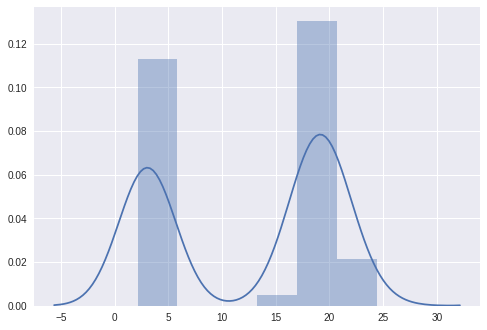

In [9]:
import seaborn as sns
sns.distplot(rmsd_lst)
plt.savefig("Analysis/Results/normal_after_min_{}_without.png".format(n))
plt.show()

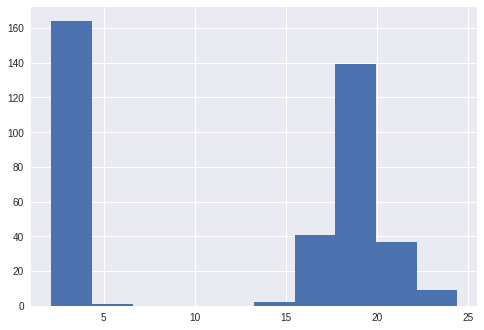

In [10]:
plt.hist(rmsd_lst)
plt.savefig("Analysis/Results/normal_after_min_{}_without_hist.png".format(n))
plt.show()

In [11]:
min(rmsd_lst)

2.1282157459033875

In [10]:
np.argmin(rmsd_lst)

390

In [9]:
files[3441]

'/home/htyao/Projets/meet-U/Analysis/Results/Normal_without/pdb_mini/1AY7_002038_min.pdb'